<a href="https://colab.research.google.com/github/abhimithra02/Learning-Activations-in-Neural-Networks/blob/main/Happymonk_Test_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

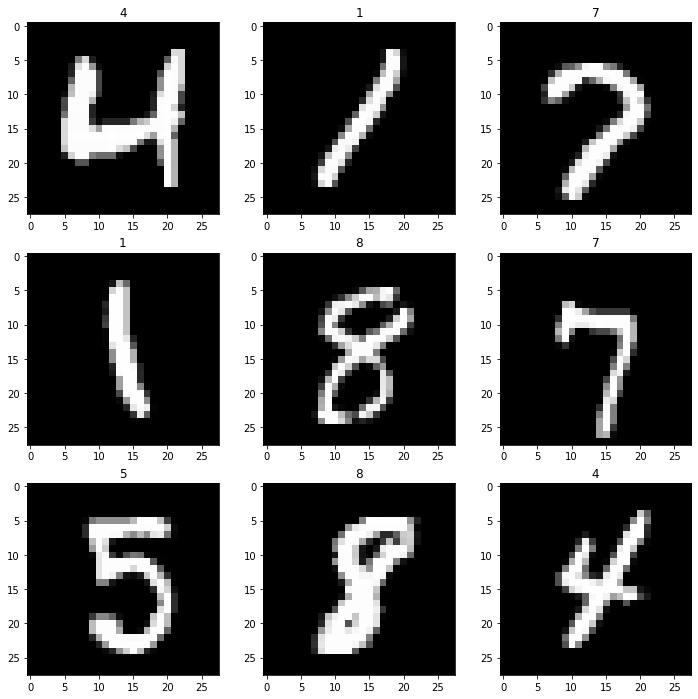

In [ ]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
from keras.utils import to_categorical

In [ ]:
print("Class label of first image :", y_train[0])

Y_train = tf.keras.utils.to_categorical(y_train, 10) 
Y_test = tf.keras.utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
len_flatten = np.product(X_train.shape[1:])
X_train_flatten = X_train.reshape(X_train.shape[0],len_flatten)
X_test_flatten = X_test.reshape(X_test.shape[0],len_flatten)

In [ ]:
model = Sequential()

model.add(Dense(units=512, activation='relu', kernel_initializer='uniform',input_shape=(len_flatten,)))
model.add(Dense(units=128, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=64, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=10, activation='softmax',kernel_initializer='uniform'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 478,250
Trainable params: 478,250
Non-trainable params: 0
_________________________________________________________________


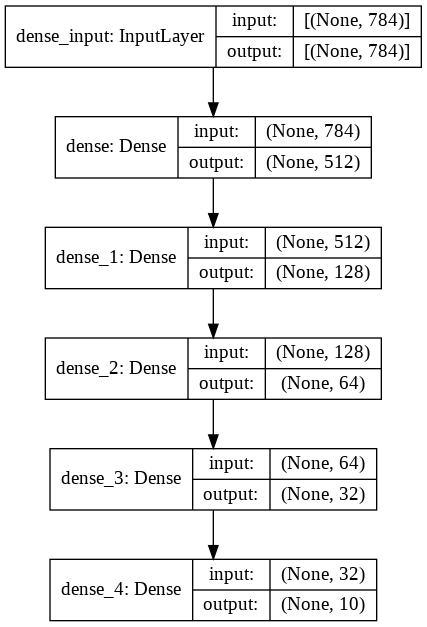

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_flatten, Y_train,epochs=10,validation_split=.25)

Epoch 1/10
1407/1407 [==============================] - 10s 6ms/step - loss: 0.7614 - accuracy: 0.7397 - val_loss: 0.1921 - val_accuracy: 0.9429
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1534 - accuracy: 0.9566 - val_loss: 0.1270 - val_accuracy: 0.9617
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0910 - accuracy: 0.9730 - val_loss: 0.1392 - val_accuracy: 0.9587
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.1408 - val_accuracy: 0.9609
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.1222 - val_accuracy: 0.9659
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0980 - val_accuracy: 0.9741
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.1212 - val_accuracy

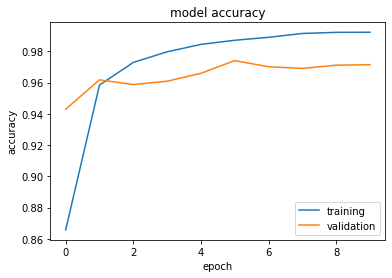

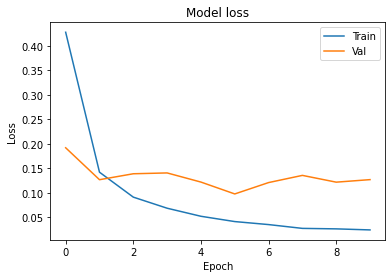

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [ ]:
model.evaluate(X_test_flatten,Y_test)
model.evaluate(X_train_flatten,Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0467 - accuracy: 0.9884


[0.04671304672956467, 0.9884333610534668]

In [ ]:
model1 = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='softmax'),
    Dense(64, activation='softmax'),
    Dense(10)
])

model1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist= model1.fit(X_train, Y_train, epochs=10,validation_split=.25)

Epoch 1/10
1407/1407 [==============================] - 4s 3ms/step - loss: 12.9302 - accuracy: 0.1141 - val_loss: 13.0449 - val_accuracy: 0.1076
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 13.0765 - accuracy: 0.1134 - val_loss: 13.0449 - val_accuracy: 0.1076
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 13.0961 - accuracy: 0.1142 - val_loss: 13.0449 - val_accuracy: 0.1076
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 13.0535 - accuracy: 0.1138 - val_loss: 13.0449 - val_accuracy: 0.1076
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 13.0979 - accuracy: 0.1168 - val_loss: 13.0449 - val_accuracy: 0.1076
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 13.0545 - accuracy: 0.1129 - val_loss: 13.0449 - val_accuracy: 0.1076
Epoch 7/10
1407/1407 [==============================] - 4s 3ms/step - loss: 13.1310 - accuracy: 0.1124 - val_loss: 13.0449 -

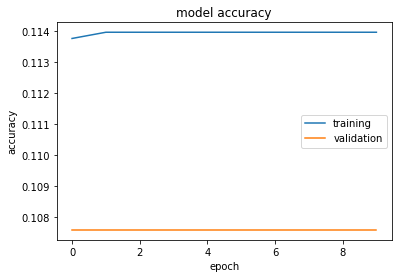

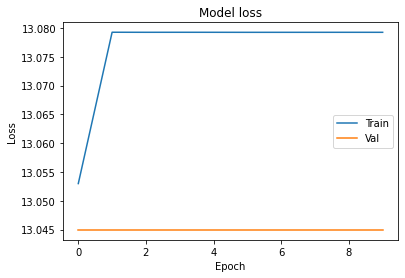

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.show()

In [ ]:
model1.evaluate(X_test,Y_test)
model1.evaluate(X_train,Y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 13.0706 - accuracy: 0.1124


[13.070632934570312, 0.11236666887998581]

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [ ]:
prediction = model1.predict(X_test_flatten)

prediction_binary = np.argmax(prediction, axis=1)
y_test_binary = np.argmax(Y_test, axis=1)

print(f1_score(y_test_binary, prediction_binary, average='micro'))

0.1135


In [ ]:
cm = confusion_matrix(y_test_binary, prediction_binary)

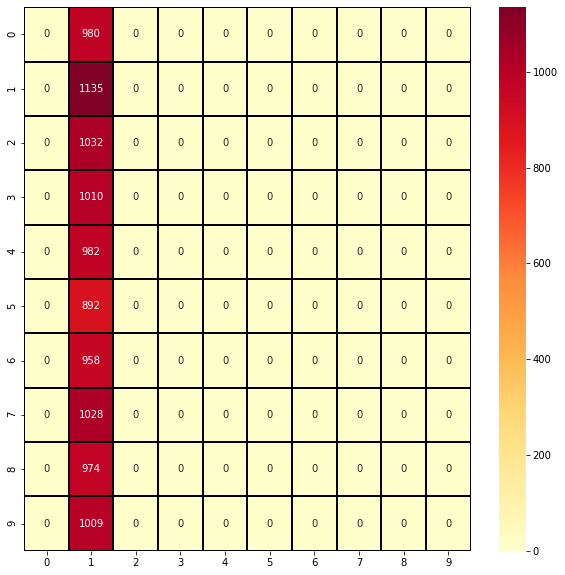

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "YlOrRd", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
print(metrics.classification_report(y_test_binary, prediction_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

